_Heavily inspired by 3b1b_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from model import Model
from words import words, answers

model = Model(words, answers)

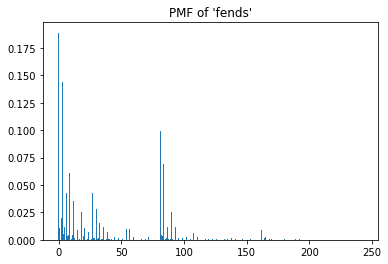

In [3]:
priors = model.get_naive_priors()
weights = model.get_weights(words, priors)
distributions = model.get_distributions(words, words, weights)

r_word_idx = np.random.choice(np.arange(len(words)))
plt.title(f"PMF of '{words[r_word_idx]}'")
plt.bar(np.arange(3 ** 5), distributions[r_word_idx])
plt.show()

In [4]:
entropies = model.get_entropies(words, words, weights)
print(f"Entropy of '{words[r_word_idx]}' = {entropies[r_word_idx]}")

best_word_idx = np.argmax(entropies)
best_word = words[best_word_idx]
print(f"The word with the largest entropy is '{best_word}', with an entropy of {entropies[best_word_idx]}")

Entropy of 'fends' = 4.416878975614166
The word with the largest entropy is 'soare', with an entropy of 5.885960110378855


In [5]:
best_word_most_likely_result = np.argmax(distributions[best_word_idx])
remaining_solutions = model.get_possible_answers(best_word, best_word_most_likely_result, np.asarray(answers))
print('Remaining solutions after best case:')
print(f'{remaining_solutions[:9]} ... {len(remaining_solutions)}/{len(answers)} words remaining')

Remaining solutions after best case:
['humph' 'digit' 'cluck' 'mimic' 'flick' 'lying' 'civic' 'guild' 'thumb'] ... 183/2315 words remaining


In [10]:
from game import Game
from IPython.display import clear_output

model = Model(words, answers)

score, failed = 0., 0
num_games = len(answers)
for answer in answers[:num_games]:
    g = Game(answer)
    results = model(g.get_solution())
    print(f"The word is '{g.get_solution()}'")

    solved = False
    for i in range(min(len(results), 6)):
        word = results[i]
        result = g.guess(word)
        print(f'Guess {i+1}: {g.result_as_boxes(result)} {word}')
        cnt = np.sum([c == 'Y' for c in result])
        if cnt == 5:
            score += i + 1
            solved = True
            break
    if not solved:
        score += 7
        failed += 1

    clear_output(wait = True)

avg_score = score / float(num_games)
print(f'Model failed {failed} out of {num_games} games')
print(f'The average score is {avg_score}')

Model failed 11 out of 2315 games
The average score is 3.6168466522678187


In [9]:
model = Model(words, answers, naive = False)

score, failed = 0., 0
num_games = len(answers)
for answer in answers[:num_games]:
    g = Game(answer)
    results = model(g.get_solution())
    print(f"The word is '{g.get_solution()}'")

    solved = False
    for i in range(min(len(results), 6)):
        word = results[i]
        result = g.guess(word)
        print(f'Guess {i+1}: {g.result_as_boxes(result)} {word}')
        cnt = np.sum([c == 'Y' for c in result])
        if cnt == 5:
            score += i + 1
            solved = True
            break
    if not solved:
        score += 7
        failed += 1

    clear_output(wait = True)

avg_score = score / float(num_games)
print(f'Model failed {failed} out of {num_games} games')
print(f'The average score is {avg_score}')

Model failed 11 out of 2315 games
The average score is 3.5861771058315335


In [7]:
g = Game("fried")
results = model(g.get_solution())
print(f"The word is '{g.get_solution()}'")

for i in range(min(len(results), 6)):
    word = results[i]
    result = g.guess(word)
    print(f'Guess {i+1}: {g.result_as_boxes(result)} {word}')
    cnt = np.sum([c == 'Y' for c in result])
    if cnt == 5:
        score += i + 1
        solved = True
        break

The word is 'fried'
Guess 1: ⬛⬛⬛🟨🟨 soare
Guess 2: 🟨🟨⬛🟩🟨 deter
Guess 3: ⬛🟩🟩🟩🟩 pried
Guess 4: 🟩🟩🟩🟩🟩 fried
